<a href="https://colab.research.google.com/github/Orion1914/Screenmatch-web-fron-main-Public/blob/main/baseline_para_testes1%20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALANDO AS BIBLIOTECAS**

In [2]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

**BAIXANSO RECURSO NLTK** #Facilita a compreensão de palavras escritas por diversos usuários

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**LER AQUIVO JSON**

In [5]:
url = 'https://raw.githubusercontent.com/Hackathon-ONE-II/SentimentAPI/main/data-science/datasets/reviews_mercadolivre_com_br_1.json'
df = pd.read_json(url)  # Atribui á uma variável os dados importados
df.head()  # Visualizar os dados

,date,rating,content,product_url
0,09 set. 2023,5,Top.,https://produto.mercadolivre.com.br/MLB-314957...
1,19 ago. 2024,5,"Produto bom, cumpre o que promete.",https://produto.mercadolivre.com.br/MLB-314957...
2,15 fev. 2025,5,Ótima qualidade.,https://produto.mercadolivre.com.br/MLB-314957...
3,11 fev. 2025,4,Bom.,https://produto.mercadolivre.com.br/MLB-314957...
4,10 jan. 2025,5,Atendeu minhas expectativas.,https://produto.mercadolivre.com.br/MLB-314957...


In [6]:
df = df.rename(columns={
    'content': 'review_text',
    'rating': 'rating'
})

**Criar o rótulo (sentimento)**

👉 Baseline binário

In [7]:
df['sentimento'] = df['rating'].apply(
    lambda x: 1 if x >= 4 else 0
)

1 → Positivo

0 → Negativo

**Separar treino e teste**

In [9]:
from sklearn.model_selection import train_test_split
X = df['review_text'].astype(str)
y = df['sentimento']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Vetorização com TF-IDF (ESSENCIAL)**

In [10]:
stop_words = stopwords.words('portuguese')

tfidf = TfidfVectorizer(
    stop_words=stop_words,
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


NameError: name 'stopwords' is not defined

**Treinar o modelo simples**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

**Avaliar o baseline**

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.9578662543486665
              precision    recall  f1-score   support

           0       0.81      0.40      0.54      1267
           1       0.96      0.99      0.98     19429

    accuracy                           0.96     20696
   macro avg       0.89      0.70      0.76     20696
weighted avg       0.95      0.96      0.95     20696



**Teste rápido (demo)**

In [ ]:
exemplos = [
    "Produto excelente, recomendo!",
    "Entrega atrasou e atendimento péssimo"
]

ex_tfidf = tfidf.transform(exemplos)
model.predict(ex_tfidf)


array([1, 0])

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk

nltk.download('stopwords', quiet=True)
stop_words = nltk.corpus.stopwords.words('portuguese')

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words=stop_words,
        max_features=5000
    )),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.40      0.54      1267
           1       0.96      0.99      0.98     19429

    accuracy                           0.96     20696
   macro avg       0.89      0.70      0.76     20696
weighted avg       0.95      0.96      0.95     20696



**Distribuição das Avaliações**

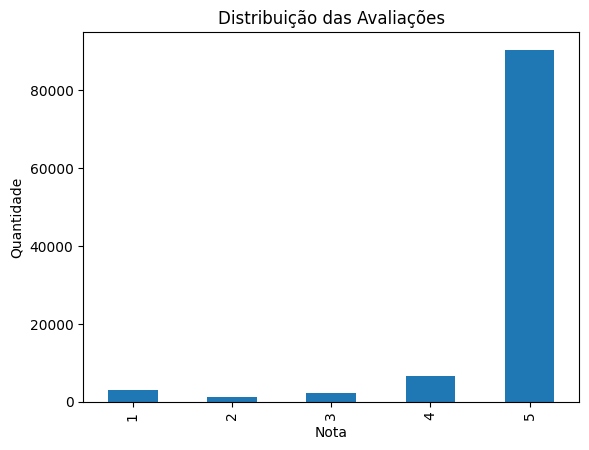

In [16]:
plt.figure()
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição das Avaliações")
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()

**TAMANHO DOS COMENTÁRIOS**

In [17]:
df['review_length'] = df['review_text'].astype(str).str.len()
df['review_length'].describe()

,review_length
count,103476.000000
mean,55.876136
std,67.966773
min,0.000000
25%,15.000000
50%,36.000000
75%,70.000000
max,1499.000000


**PALAVRAS MAIS FREQUENTES**

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Ensure nltk stopwords is downloaded
nltk.download('stopwords', quiet=True)

stop_words = set(nltk.corpus.stopwords.words('portuguese'))

def tokenize_and_clean(text):
    # Ensure text is string, convert if not (e.g., if there are NaNs)
    text = str(text).lower() # Convert to lowercase
    tokens = word_tokenize(text, language='portuguese')
    # Remove stopwords and non-alphabetic tokens
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

df['tokens'] = df['review_text'].apply(tokenize_and_clean)

all_words = [word for tokens_list in df['tokens'] for word in tokens_list]
Counter(all_words).most_common(20)

[('produto', 26974),
 ('bom', 22165),
 ('cabelo', 21799),
 ('maravilhoso', 13654),
 ('ótimo', 10312),
 ('excelente', 10281),
 ('amei', 7926),
 ('bem', 7898),
 ('recomendo', 7860),
 ('cheiro', 7432),
 ('super', 7412),
 ('uso', 6491),
 ('deixa', 6388),
 ('gostei', 6304),
 ('usei', 4442),
 ('perfeito', 4432),
 ('cabelos', 4307),
 ('resultado', 3929),
 ('melhor', 3910),
 ('fica', 3872)]

**NUVEM DE PALAVRAS**

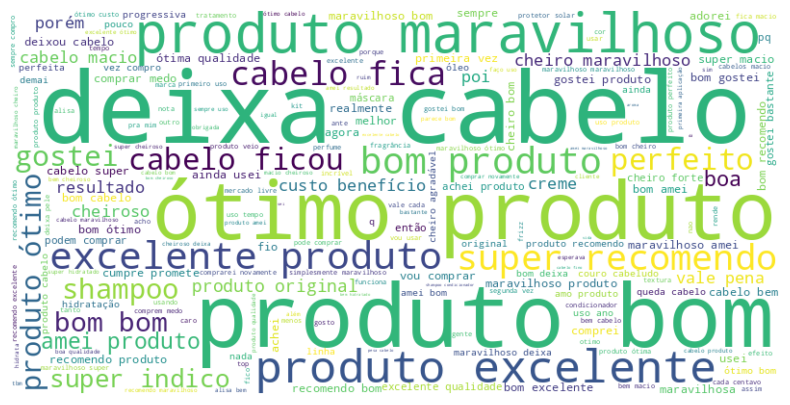

In [20]:
from wordcloud import WordCloud

text = " ".join([word for tokens_list in df['tokens'].dropna() for word in tokens_list])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**NOTA X TAMANHO DO COMENTÁRIO**

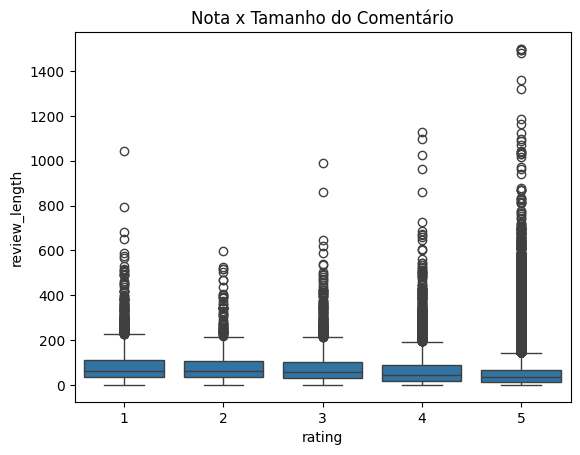

In [21]:
plt.figure()
sns.boxplot(x='rating', y='review_length', data=df)
plt.title("Nota x Tamanho do Comentário")
plt.show()

**CLASSIFICAÇÃO SIMPLES DO SENTIMENTO**

In [22]:
df['sentimento'] = df['rating'].apply(
    lambda x: 'positivo' if x >= 4 else 'negativo'
)

df['sentimento'].value_counts()

,count
sentimento,
positivo,96948
negativo,6528


**EXEMPLOS DE REVIEWS NEGATIVAS (PARA INSIGHT)**

In [23]:
df[df['sentimento'] == 'negativo'][['rating', 'review_text']].head(5)

,rating,review_text
47,1,Produto ruim baixa qualidade.
101,2,Caro e cheiroso. Nada mais.
114,3,"A fragrância é boa,mas não deixa os cabelos ma..."
127,1,Não dá resultado esperado.
156,1,Não gostei não.


**Salvar o baseline**

In [26]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk

nltk.download('stopwords', quiet=True)
stop_words = nltk.corpus.stopwords.words('portuguese')

# Redefine and fit the pipeline for robustness in this saving cell
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words=stop_words,
        max_features=5000
    )),
    ('clf', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "baseline_tfidf.joblib")

['baseline_tfidf.joblib']